Lets have fun with building Decision Trees:

You are building the decision tree classifier with the Scikit learn.

Downlaod the data of Pima Indian diabetes from Kaggle.

Feature Selection - you need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

Split the data and then build decision tree.

Use visualisation to showcase the pictorial representation.

Find the Entropy, Information gain and Gini Index to support why you choose the specific root node.

In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score, classification_report
from math import log2


In [6]:
# Load the dataset
df = pd.read_csv("diabetes.csv")
print(df.head())

# Checking for missing values
print(df.isnull().sum())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [7]:
# Independent variables
X = df.drop('Outcome', axis=1)

# Dependent variable
y = df['Outcome']


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)


In [9]:
# Model using Entropy (Information Gain)
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy.fit(X_train, y_train)

# Model using Gini Index
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_gini.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [10]:
# Predictions
y_pred_entropy = dt_entropy.predict(X_test)
y_pred_gini = dt_gini.predict(X_test)

# Accuracy comparison
print("Accuracy (Entropy):", accuracy_score(y_test, y_pred_entropy))
print("Accuracy (Gini):", accuracy_score(y_test, y_pred_gini))

# Detailed classification report
print("\nClassification Report (Entropy):\n", classification_report(y_test, y_pred_entropy))


Accuracy (Entropy): 0.7552083333333334
Accuracy (Gini): 0.7447916666666666

Classification Report (Entropy):
               precision    recall  f1-score   support

           0       0.79      0.86      0.82       125
           1       0.68      0.57      0.62        67

    accuracy                           0.76       192
   macro avg       0.73      0.71      0.72       192
weighted avg       0.75      0.76      0.75       192



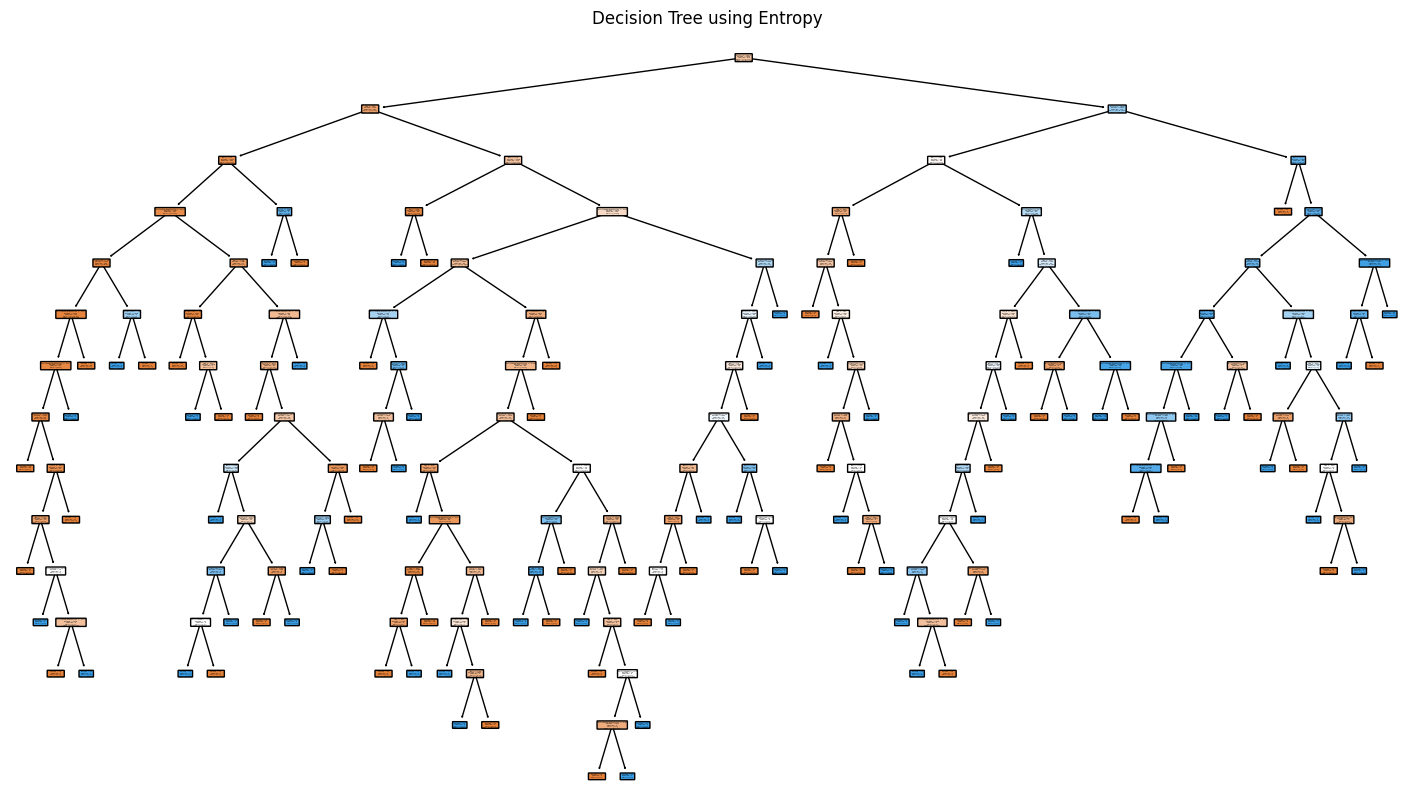

In [11]:
plt.figure(figsize=(18, 10))
plot_tree(dt_entropy, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'],
           filled=True, rounded=True)
plt.title("Decision Tree using Entropy")
plt.show()


In [12]:
# Helper functions
def entropy(p):
    if p == 0 or p == 1:
        return 0
    return -p*log2(p) - (1-p)*log2(1-p)

def gini(p):
    return 2*p*(1-p)

# Overall dataset entropy
p1 = y.value_counts()[1] / len(y)
p0 = y.value_counts()[0] / len(y)
overall_entropy = entropy(p1)
overall_gini = gini(p1)
print(f"Overall Dataset Entropy: {overall_entropy:.4f}")
print(f"Overall Dataset Gini: {overall_gini:.4f}")

# Split on median of Glucose
threshold = df['Glucose'].median()
left = df[df['Glucose'] <= threshold]
right = df[df['Glucose'] > threshold]

# Entropy of left and right groups
def group_entropy(group):
    p1 = group['Outcome'].mean()
    return entropy(p1)

E_left = group_entropy(left)
E_right = group_entropy(right)

# Weighted average entropy
weighted_entropy = (len(left)/len(df))*E_left + (len(right)/len(df))*E_right

# Information Gain
info_gain = overall_entropy - weighted_entropy

print(f"Entropy(Glucose <= {threshold}): {E_left:.4f}")
print(f"Entropy(Glucose > {threshold}): {E_right:.4f}")
print(f"Information Gain (Glucose): {info_gain:.4f}")


Overall Dataset Entropy: 0.9331
Overall Dataset Gini: 0.4544
Entropy(Glucose <= 117.0): 0.6430
Entropy(Glucose > 117.0): 0.9951
Information Gain (Glucose): 0.1173


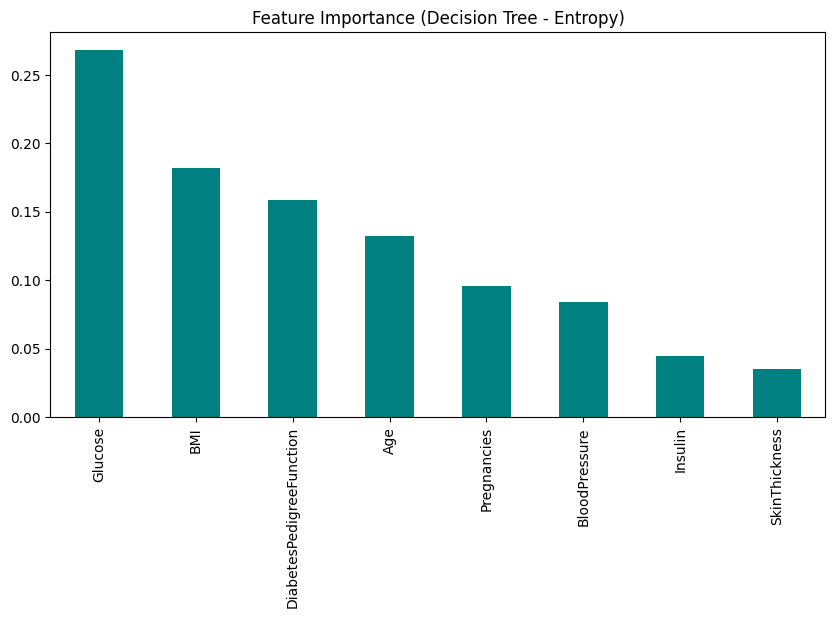

In [13]:
# Feature importance from the model
importances = pd.Series(dt_entropy.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(10,5), color='teal')
plt.title("Feature Importance (Decision Tree - Entropy)")
plt.show()
